## Data Prep

In [355]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import datetime as DT


#read file
df1 = pd.read_csv('players1.csv')
df2 = pd.read_csv('players2.csv')
df3 = pd.read_csv('players3.csv')
frames = [df1, df2, df3]
df = pd.concat(frames,ignore_index=True)

#set filter: how strong would you like your players?
#df = df[(df['overall_rating']>90) & (df['sliding_tackle']>20)]

#change dob to age
now = pd.Timestamp(DT.datetime.now())
df['dob'] = pd.to_datetime(df['dob'], infer_datetime_format=True)    # 1
df['dob'] = df['dob'].where(df['dob'] < now, df['dob'] -  np.timedelta64(100, 'Y'))   # 2
df['age'] = (now - df['dob']).astype('<m8[Y]')    # 3


#Group parameters
df['Tackling'] = df[['SlidingTackle','StandingTackle']].mean(axis=1).astype('int')
df['Passing'] = df[['LongPassing','ShortPassing']].mean(axis=1).astype('int')
df['Movement'] = df[['Acceleration','SprintSpeed','Agility']].mean(axis=1).astype('int')
df = df[(df['club_pos']!='SUB')]

bar_df = df


#Position Profile
mapp = {'RM':'Midfield',
'GK': 'Goalkeeper',
'CB': 'Defense',
'LCB':'Defense',
'RCB': 'Defense',
'LB':'Defense',
'RB': 'Defense',
'CM' : 'Midfield',
'LDM': 'Midfield',
'LAM': 'Midfield',
'RDM': 'Midfield',
'RAM': 'Midfield',
'CDM': 'Midfield',
'CAM': 'Midfield',
'LM' : 'Midfield',
'RM' : 'Midfield',
'ST': 'Attack',
'CF': 'Attack',
'LW': 'Attack',
'RW': 'Attack',
'RS': 'Attack',
'LS' : 'Attack'}


#group positions by above mapping
grouped =  df.set_index('club_pos').groupby(mapp)
new_df = grouped
df = grouped.agg([np.mean])
#remove unnecessary titles
df.columns = df.columns.droplevel(1)
#Take wanted parameters
#set filter: what attributes would you like to see?
df = df[['Tackling','Interceptions','Passing','BallControl','Dribbling','Movement','Finishing']].astype('int')
#IF not including goalkeepers
df.drop('Goalkeeper',inplace=True)
#cleanup
df.reset_index(level=0, inplace=True)
df.rename(index=int, columns={"index": "Position"},inplace=True)

df

,Position,Tackling,Interceptions,Passing,BallControl,Dribbling,Movement,Finishing
0,Attack,32,36,72,85,84,82,84
1,Defense,84,83,73,73,65,69,47
2,Midfield,53,58,80,84,82,75,70


### Radar Plot

This is the code showing how to get the radar plots of skills according to position on the field.

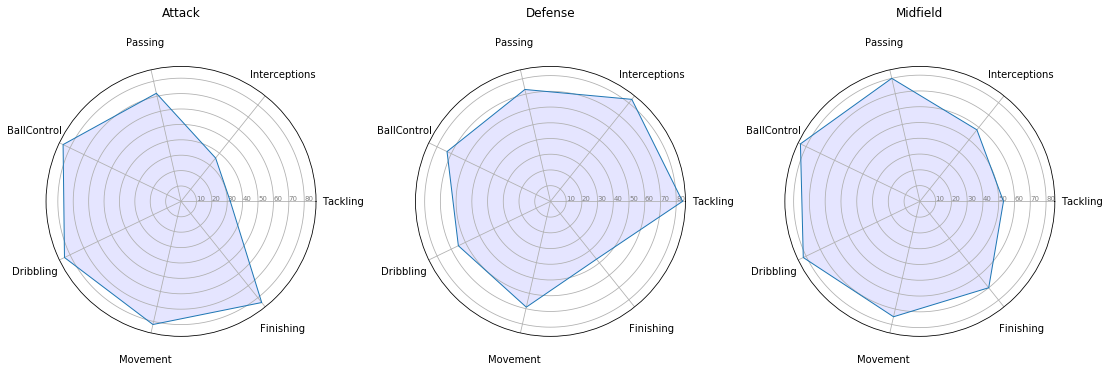

In [357]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import math
from math import pi
 
#set data
size = len(df)    
fig = plt.figure(figsize=(20,20))
for i in xrange(0,size):
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df.loc[i].drop('Position').values.flatten().tolist()
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    #angles = [math.degrees(float(angles[c])) for c in range(len(angles))]
    #angles = xrange(0,360,360/N)
    
    
    plots = 111 + 10*len(df)+i
    # Initialise the spider plot
    ax = fig.add_subplot(plots, polar=True)
    #ax.set_theta_offset(pi / 2)
    #ax.set_theta_direction(1)

    ax.set_title(df['Position'][i]+'\n'+'\n')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=10)
    ax.tick_params(axis='x', which='major', pad=17)
    # set ticklabels location at 1.3 times the axes' radius
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(color="grey", size=7)
    #plt.ylim(0,40)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
plt.tight_layout() 
plt.show()

### Line Chart

This shows how to plot correlations between wage, age and position in one graph, using the line plot. The stacks will be the positions, X the age, Y the wage. 

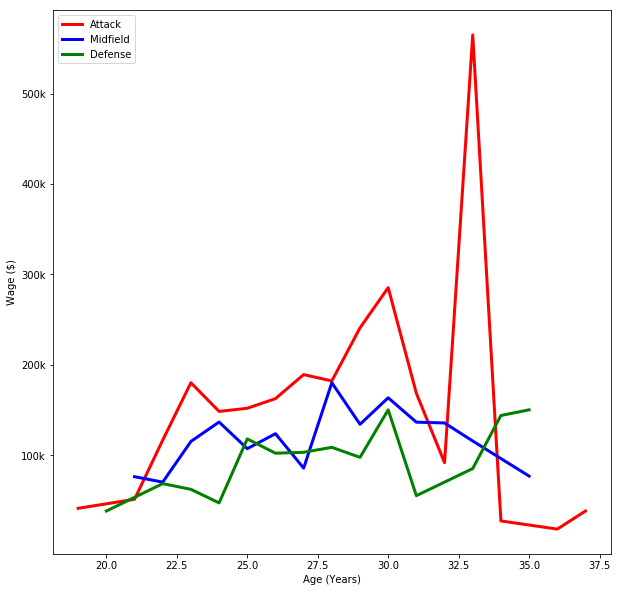

In [318]:
# library
import numpy as np
import matplotlib.pyplot as plt
 
fig=plt.figure(figsize=(10, 10))
y1 = new_df.get_group('Attack')
#y1.drop(y1[y1.full_name == 'L. Messi'].index, inplace=True)
#y1.drop(y1[y1.full_name == 'Cristiano Ronaldo'].index, inplace=True)
grouped =  y1.set_index('age').groupby('age')
y1 = grouped.agg([np.mean])
y1 = y1[['wage']]

y2 = new_df.get_group('Defense')
grouped =  y2.set_index('age').groupby('age')
y2 = grouped.agg([np.mean])
y2 = y2[['wage']]

y3 = new_df.get_group('Midfield')
grouped =  y3.set_index('age').groupby('age')
y3 = grouped.agg([np.mean])
y3 = y3[['wage']]


plt.plot(y1.index, y1['wage'], 'r', y2.index, y2['wage'], 'b', y3.index, y3['wage'],'g',linewidth=3)
plt.legend(labels=['Attack','Midfield','Defense'], loc='upper left')
plt.xlabel('Age (Years)')
plt.ylabel('Wage ($)')
#with the best
plt.yticks(range(100000,600000,100000),['100k','200k','300k','400k','500k'])
#without
#plt.yticks(range(50000,350000,50000),['50k','100k','150k','200k','250k','300k'])

plt.show()


# Basic stacked area chart.
#plt.stackplot(x,y1, y2, y3, labels=['A','B','C'])



### Bar Plot

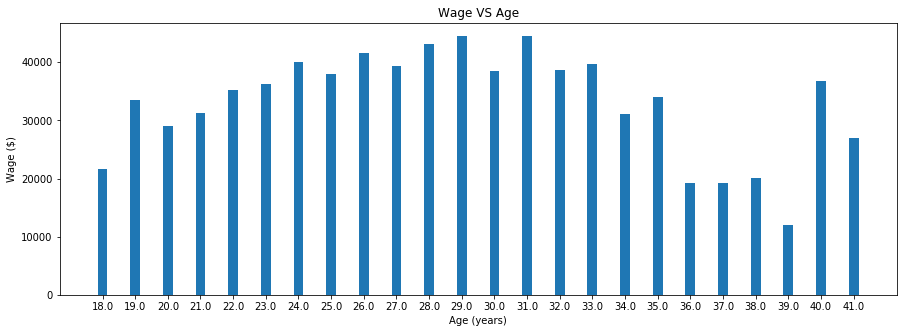

In [319]:
import matplotlib.pyplot as plt
import numpy as np
df = bar_df
#df.drop(df[df.full_name == 'L. Messi'].index, inplace=True)
#df.drop(df[df.full_name == 'Cristiano Ronaldo'].index, inplace=True)
grouped = df.set_index('age').groupby('age')
df = grouped.agg([np.mean]).reset_index()
age = df['age']
wage = df['wage']
y_pos = np.arange(len(age))
plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.bar(y_pos,wage['mean'], 0.3, 0.3, align='center')
plt.xticks(y_pos, age)
plt.ylabel('Wage ($)')
plt.xlabel('Age (years)')
plt.title('Wage VS Age')
#plt.ylim(75,100)
plt.show()

## Histogram

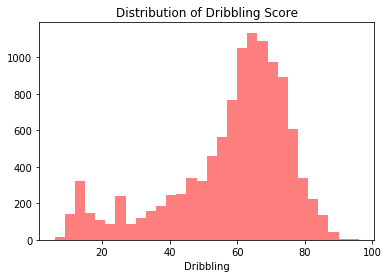

In [320]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('Player_Attributes.csv')
player_names = pd.read_csv('Player.csv')
#df = df[(df['overall_rating']>90) & (df['dribbling']>80)]
df = df.drop_duplicates(subset=['player_fifa_api_id'])
df = df[['player_fifa_api_id','finishing','dribbling','shot_power','ball_control','sprint_speed']]
df['player_fifa_api_id'] = df['player_fifa_api_id'].map(player_names.set_index('player_fifa_api_id')['player_name'])
player_attributes2 = df.rename(index=str, columns={'player_fifa_api_id': 'player_name'})
player_attributes2.index = range(len(df))



df = player_attributes2
performance = df['dribbling']
ax = plt.subplot(111)
ax.hist(performance.dropna(),30, alpha=0.5, color='red')
plt.xlabel('Dribbling')
plt.title('Distribution of Dribbling Score')
plt.show()



### World Map Plot

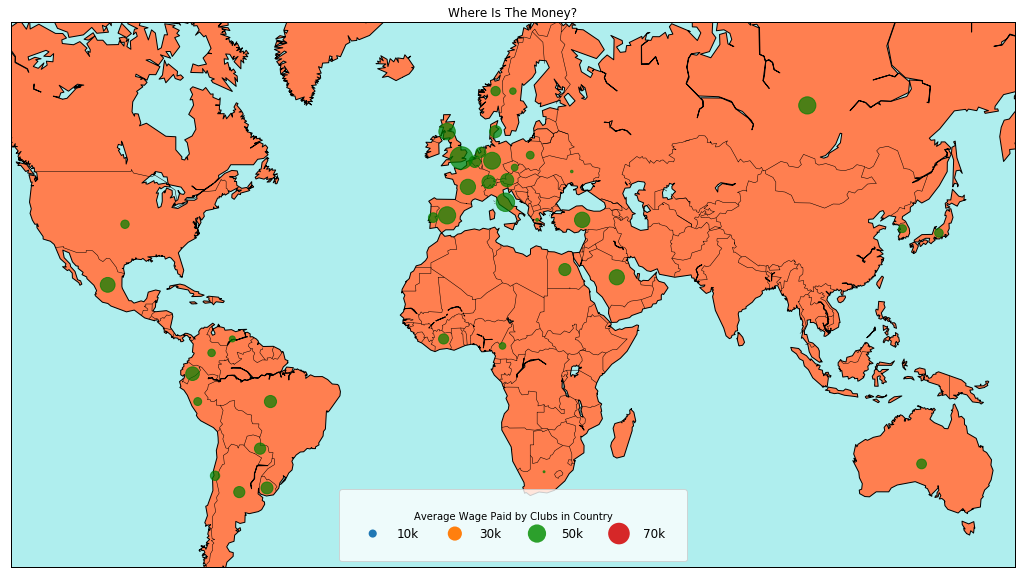

In [353]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import re


#data prep
#read file
df1 = pd.read_csv('players1.csv')
df2 = pd.read_csv('players2.csv')
df3 = pd.read_csv('players3.csv')
frames = [df1, df2, df3]
df = pd.concat(frames,ignore_index=True)
#need only country and wage
df = df[['country','wage']]
#clean up country column
df2 = pd.DataFrame(df['country'].str.split(',').values.tolist())
df = pd.concat([df['wage'], df2], axis=1)
#df.drop(df[df[1] == None].index, inplace=True)
df = df[['wage',0]]
df[0] = df[0].apply(lambda x: re.sub("[^a-zA-Z ]+", "", x))
df.rename(index=int, columns={0: "country"},inplace=True)

#average country wage
grouped =  df.groupby('country')
df = grouped.agg([np.mean])


df = df.iloc[1:]

#convert country to coordinates
ccoor = pd.read_csv('CountryLatLong.csv')
ccoor[['Country','Latitude (average)','Longitude (average)']]
ccdict = ccoor.set_index('Country')[['Longitude (average)','Latitude (average)']].apply(tuple,axis=1).to_dict()

# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.


## WORLD MAP MERC
"""
m = Basemap(projection='merc',llcrnrlat=-50,urcrnrlat=60,\
           llcrnrlon=-130,urcrnrlon=160,lat_ts=20,resolution='c')

m = Basemap(resolution='l',projection='merc',
             llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,
             lat_ts=(x1+x2)/2)

"""



fig=plt.figure(figsize=(18, 16))
#Let's create a basemap of Europe
x1 = -20.
x2 = 40.
y1 = 32.
y2 = 64.

m = Basemap(projection='merc',llcrnrlat=-50,urcrnrlat=70,\
           llcrnrlon=-130,urcrnrlon=160,lat_ts=20,resolution='c')
m.drawmapboundary(fill_color='paleturquoise')
m.fillcontinents(color='coral',lake_color='paleturquoise')
m.drawcoastlines()
m.drawcountries()
plt.title("Where Is The Money?")

lon = []
lat = []

## in progress
for i in xrange(0,len(df)):
    coords = ccdict[str(df.index[i])]
    lon.append(coords[0])
    lat.append(coords[1])
    
norm = 150  
m.scatter(lon, lat, latlon=True, s=df[['wage']]/norm, alpha=0.7,zorder=10,c='green')
l1 = plt.scatter([],[], s=10000/norm, edgecolors='none')
l2 = plt.scatter([],[], s=30000/norm, edgecolors='none')
l3 = plt.scatter([],[], s=50000/norm, edgecolors='none')
l4 = plt.scatter([],[], s=70000/norm, edgecolors='none')

labels = ["10k", "30k", "50k", "70k"]

leg = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True, fontsize=12,
handlelength=2, loc = 8, borderpad = 1.8,
handletextpad=1, title='Average Wage Paid by Clubs in Country', scatterpoints = 1)

plt.show()
